# Dealing with Missind Data with R

5 ways to deal with missing Data:
- Deleting all row with missing data
- Deleteing rows with missing data inspecific variable
- Change missing data to a value
- Imputation (means to fill the missing data with something predicted to what the data could possibly be) 

In [2]:
library(tidyverse)

In [16]:
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


### Just grabbing the columns we want to look at

In [6]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    head()


name,gender,hair_color,height
<chr>,<chr>,<chr>,<int>
Luke Skywalker,masculine,blond,172
C-3PO,masculine,NA,167
R2-D2,masculine,NA,96
Darth Vader,masculine,none,202
Leia Organa,feminine,brown,150
Owen Lars,masculine,"brown, grey",178


### Shows only my rows with Missing Data

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    filter(!complete.cases(.)) %>%
    View(

complete.cases() is a functions that extracts only rows without missing data
by putting an ! in front on the function, this tells R to do the opposite, and gathers all rows with missing data
the (.) dot means we want to use the entire data frame

### This package can show you on a large scale of data, the distribution of where the missing data is


In [10]:
library(mice)

,name,skin_color,eye_color,films,vehicles,starships,sex,gender,species,hair_color,height,homeworld,mass,birth_year,
29,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
21,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
6,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
13,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
3,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
5,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4
4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,2
1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,4


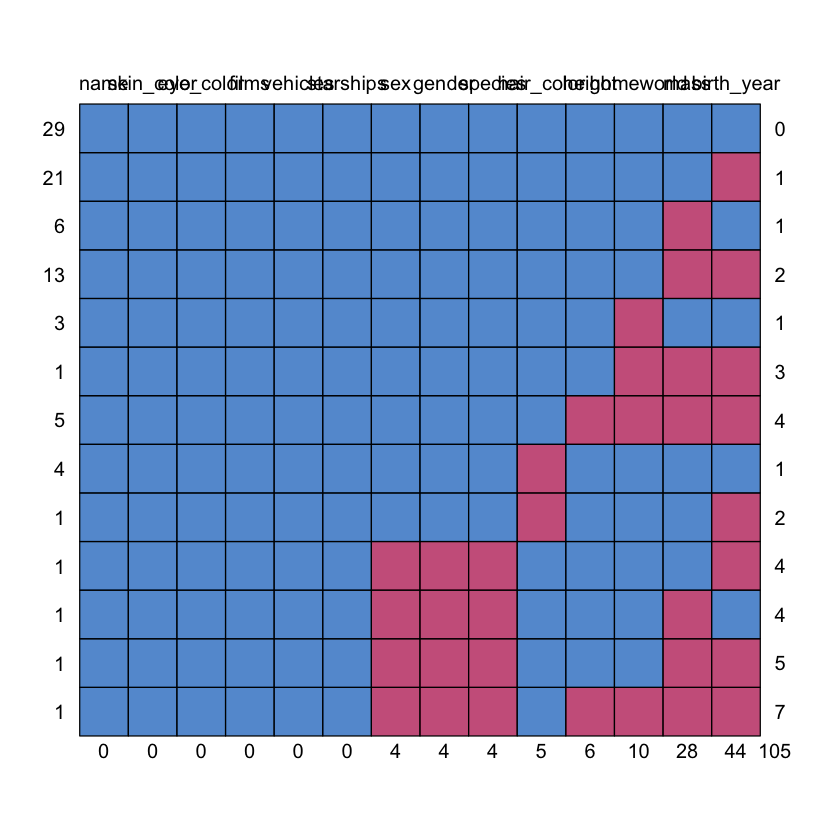

In [11]:
md.pattern(starwars)

# 1 
Omit all Rows that has missing data in it

It's a bad stradegy. You deleted any row of data that had any missing value and any variable. It's hard to know what you have removed. 

In [12]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    na.omit() %>%
    View()

name,gender,hair_color,height
<chr>,<chr>,<chr>,<int>
Luke Skywalker,masculine,blond,172
Darth Vader,masculine,none,202
Leia Organa,feminine,brown,150
Owen Lars,masculine,"brown, grey",178
Beru Whitesun lars,feminine,brown,165
Biggs Darklighter,masculine,black,183
Obi-Wan Kenobi,masculine,"auburn, white",182
Anakin Skywalker,masculine,blond,188
Wilhuff Tarkin,masculine,"auburn, grey",180


# 2 
Omit all Rows that has missing data from a specific variable, in this case the `height` column

In [18]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    drop_na(height) %>%
    filter(!complete.cases(.)) %>%
    View()

name,gender,hair_color,height
<chr>,<chr>,<chr>,<int>
C-3PO,masculine,NA,167
R2-D2,masculine,NA,96
R5-D4,masculine,NA,97
Greedo,masculine,NA,173
Jabba Desilijic Tiure,masculine,NA,175
Ric Olié,NA,brown,183
Quarsh Panaka,NA,black,183
Sly Moore,NA,none,178


# 3 
Omit all Rows that has missing data from a specific variable, in this case the `height` column.
AND
Change all the na's in the `gender` column to none by using the `mutate()` function.

`mutate()` can be used to change to a new variable or overwrite an exsisting variable

In [20]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    drop_na(height) %>%
    mutate(gender = replace_na(gender, "none")) %>%
    filter(!complete.cases(.)) %>%
    View()

name,gender,hair_color,height
<chr>,<chr>,<chr>,<int>
C-3PO,masculine,NA,167
R2-D2,masculine,NA,96
R5-D4,masculine,NA,97
Greedo,masculine,NA,173
Jabba Desilijic Tiure,masculine,NA,175


# 4
`unique(dataset$column)` shows you all the variables in that specfic column and you can see what islisted for the variables. 

In [22]:
unique(starwars$hair_color)

[1] "blond"         NA              "none"          "brown"        
 [5] "brown, grey"   "black"         "auburn, white" "auburn, grey" 
 [9] "white"         "grey"          "auburn"        "blonde"       
[13] "unknown"

We can see that there are two variables, `NA` and `unknown`

In [24]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    mutate(hair_color = na_if(hair_color, "unknown")) %>%
    filter(is.na(hair_color)) %>%
    View()

name,gender,hair_color,height
<chr>,<chr>,<chr>,<int>
C-3PO,masculine,NA,167
R2-D2,masculine,NA,96
R5-D4,masculine,NA,97
Greedo,masculine,NA,173
Jabba Desilijic Tiure,masculine,NA,175
Captain Phasma,NA,NA,NA


This has created a new row added, includes the missing value `NA`, that hair_color use to be `unknown`

# 5
Let's see what happens when you apply a function to a vector that has missing values, in this case we havent removed any missing values, just looking for the average/mean `height` in all the characters...

In [25]:
mean(starwars$height)

[1] NA

Oh no!!! When we do that it returned `NA`